<a href="https://colab.research.google.com/github/A-vidhyalakshmi/Walmart-Case-study/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WALMART BIZ CASE STUDY

To analyse,interprete and visualize the given Walmart data and to solve the related problems like
1. Analysing customer purchase behaviour against gender and other factors
2. To underrstand if the spending habit differ between male and female customers
3. Do women spend more than men on black friday?
And to get insights and make better business decision, we need functions and methods, so we must import Python libraries into our work notebook.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

To get the data into our work space we use the below code(to read csv files)
and saving the whole set of data into a single variable(dataframe) which makes analysis easier

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart.csv

--2023-09-27 12:38:14--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.46, 18.172.139.61, 18.172.139.210, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M   107MB/s    in 0.2s    

2023-09-27 12:38:15 (107 MB/s) - ‘walmart.csv’ saved [23027994/23027994]



In [ ]:
df = pd.read_csv('walmart.csv')



In [ ]:
df.head(2)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [ ]:
df.tail(2)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
df.sample(2)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
337427,1003940,P00116842,M,36-45,20,B,3,1,2,13119
58407,1003018,P00269542,M,36-45,0,B,0,0,11,4690


In [ ]:
# TO GET NO. OF ROWS & COLUMNS:

df.shape

(550068, 10)

In [ ]:
# TO GET TOTAL ELEMENTS IN THE DATASET (i.e., the dot product of no. of rows & columns)

df.size

5500680

In [ ]:
# To get index

df.index

RangeIndex(start=0, stop=550068, step=1)

In [ ]:
# TO GET THE NAMES OF THE COLUMNS

df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
# TO GET THE NAMES OF THE COLUMNS(alternate method)

df.keys()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
# To get memory usage of each column

df.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category              4400544
Purchase                      4400544
dtype: int64

In [ ]:
# TO GET THE TOTAL INFORMATION ABOUT THE DATASET.
# info function let us know the columns with their data types and no. of non-null values & the total memory usage


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


From the above analysis we get to know that 5 columns are integer data type and the other 5 are  of object data type

### MISSING VALUE DETECTION


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### INFERENCE:
**No missing** values found

### TO ANALYSE THE BASIC METRICS

In [ ]:
# To get the data type of each column

df.dtypes


User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

##### STATISTICAL SUMMERY

In [ ]:
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Describe function returns the glimpse of the data with the statistical values from all over the data just to predict the normal ranges and average ranges to the particular elements.
Note: it will display only the numerical values and return from the numerical values.

##NOTE:
Here, marital status is considered as numerical data which has to be converted to categorical values

### CONVERSION TO CATEGORICAL ATTRIBUTE

In [ ]:
df['Marital_Status_categ'] = df['Marital_Status'].replace({0:'Single',1:'Married'})

df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Marital_Status_categ
105323,1004227,P00206442,M,26-35,19,A,0,0,1,4470,Single
220112,1003934,P00126242,M,26-35,0,B,2,0,2,9831,Single
464234,1005511,P00277442,M,46-50,1,B,1,1,1,15666,Married
48220,1001391,P00296242,M,36-45,15,C,0,1,8,7922,Married
219382,1003824,P00018342,M,26-35,17,A,3,1,11,4650,Married


In [ ]:
# To get statistical values for the object data type

df.describe(include = object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status_categ
count,550068,550068,550068,550068,550068,550068
unique,3631,2,7,3,5,2
top,P00265242,M,26-35,B,1,Single
freq,1880,414259,219587,231173,193821,324731


### INFERENCE:
1. **Male** customers are more than Female customers
2. Most customers belong to the age group of **26-35**
3. Majority of the customers are from city_category **B**
4. The Product which made the top in the sales is **P00265242**
5. Many customers stay in the current city for **1 year**
6. Number of **Unmarried** customers dominate married customers


In [ ]:
# Accessing the rows with their iloc(integer location) values

df.iloc[:4]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057


In [ ]:
# Accessing selected range of rows using external location values

df.loc[3:6]


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215


In [ ]:
# Accessing the specified columns for all rows using external location


df.loc[:,['Product_ID','Gender','Age']]

,Product_ID,Gender,Age
0,P00069042,F,0-17
1,P00248942,F,0-17
2,P00087842,F,0-17
3,P00085442,F,0-17
4,P00285442,M,55+
...,...,...,...
550063,P00372445,M,51-55
550064,P00375436,F,26-35
550065,P00375436,F,26-35
550066,P00375436,F,55+


### NON-GRAPHICAL ANALYSIS:

In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

### INFERENCE:
1. There are **5891** unique customers
2. Among all the customers, user_id **1001680** contributed the most purchase

In [ ]:
df['Product_ID'].unique()


array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [ ]:
df['Product_ID'].nunique()


3631

In [ ]:
df['Product_ID'].value_counts()


P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

### INFERENCE:
1. There are **3631** unique products in Walmart
2. Among them **P00265242** product is the most sold (ie., 1880 customers brought)

In [ ]:
df['Gender'].value_counts()


M    414259
F    135809
Name: Gender, dtype: int64

### INFERENCE:
Its a clear evidance that Male customers are more than Female

In [ ]:
df['Marital_Status'].value_counts()


0    324731
1    225337
Name: Marital_Status, dtype: int64

### INFERENCE:
**Unmarried** customers are more than the Married customers

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

### INFERENCE:
Customers belonging to the age group of **26-35** are more compared to other age groups

In [ ]:
df['Occupation'].value_counts()


4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

### INFERENCE:
Occupation of most of the customer is **4**

In [ ]:
df_cc = df.groupby(['User_ID','City_Category']).agg({'Purchase':'sum'}).reset_index()
df_cc.groupby('City_Category').agg({'Purchase':'sum'}).reset_index()


,City_Category,Purchase
0,A,1316471661
1,B,2115533605
2,C,1663807476


### INFERENCE:
Customers belonging to **city_category B** are likely to purchase more

In [ ]:
df_cc['City_Category'].value_counts()

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64

### INFERENCE:
There are **more number of customers** who belongs to City Category **C(3139)**

In [ ]:
df.groupby(['User_ID','Gender']).agg({'Gender':'count'}).rename(columns={'Gender':'count'}).reset_index().head(5)


,User_ID,Gender,count
0,1000001,F,35
1,1000002,M,77
2,1000003,M,29
3,1000004,M,14
4,1000005,M,106


In [ ]:
df.groupby('Gender').agg({'Purchase':'mean'}).reset_index()

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


### INFERENCE:
**Male** customers purchase for more amount than female customers

In [ ]:
df.groupby('Age').agg({'Age':'count'}). rename(columns ={'Age':'Age','Age':'Count'}).reset_index().sort_values('Count',ascending = False)


,Age,Count
2,26-35,219587
3,36-45,110013
1,18-25,99660
4,46-50,45701
5,51-55,38501
6,55+,21504
0,0-17,15102


### INFERENCE:
1. customers of age group **26-35** contribute more with a count of **219587**
2. Least contributed age group is **0-17** with a count of **15102**

In [ ]:
df['Product_Category'].nunique()

20

In [ ]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

### INFERENCE:
1. There are **20** unique product categories

2. Product category **5(150933)** is purchased more followed by Product category **1(140378)**


## VISUAL ANALYSIS:


### UNIVARIATE


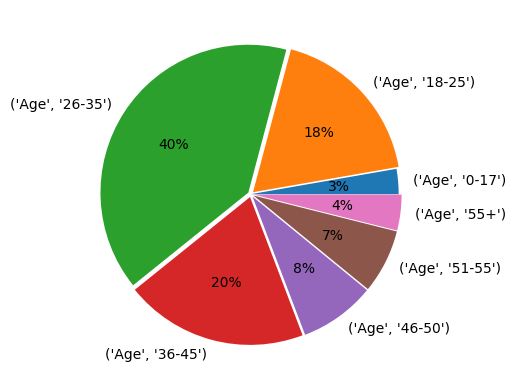

In [ ]:
age = ['Age']

df1=df[age].melt().groupby(['variable','value'])[['value']].count()/len(df)

plt.pie(df1.value, labels=df1.index,explode=[0,0.02,0.02,0.02,0.02,0.02,0.02],autopct='%.0f%%')
plt.show()

### INFERENCE:
**Most** customer belong to the age group of **26-35(40%)** whereas customers of age group **0-17(3%)** is the **least**


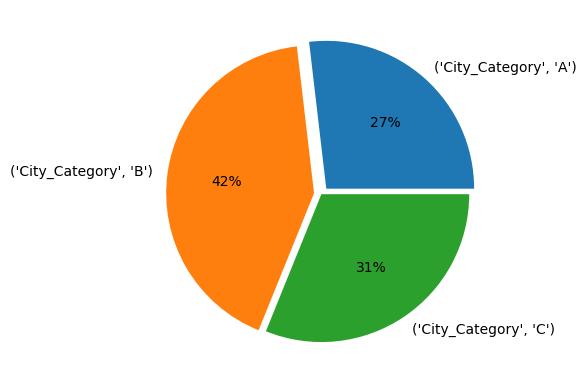

In [ ]:
City_Category = ['City_Category']

df1=df[City_Category].melt().groupby(['variable','value'])[['value']].count()/len(df)

plt.pie(df1.value, labels=df1.index,explode = [0.05,0.05,0],autopct='%.0f%%')
plt.show()

### INFERENCE:
Most customers belong to city_category **B (42%)**.


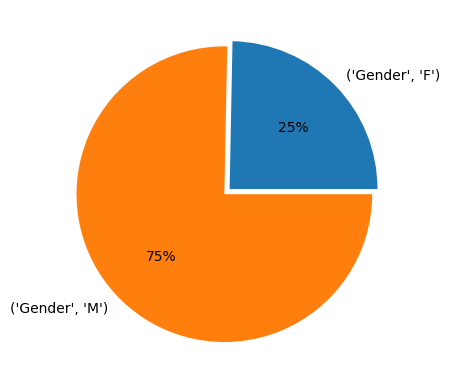

In [ ]:
Gender = ['Gender']

df1=df[Gender].melt().groupby(['variable','value'])[['value']].count()/len(df)

plt.pie(df1.value, labels=df1.index,explode= [0.05,0],autopct='%.0f%%')
plt.show()

### INFERENCE:
**75%** contribution is from **Male** constomers whereas only **25%** is contributed by **Female**

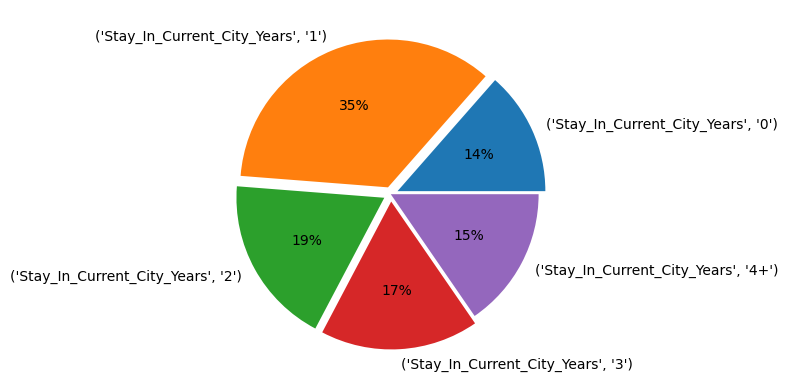

In [ ]:
Stay_In_Current_City_Years = ['Stay_In_Current_City_Years']

df1=df[Stay_In_Current_City_Years].melt().groupby(['variable','value'])[['value']].count()/len(df)

plt.pie(df1.value, labels=df1.index,explode=[0.05,0.05,0.05,0.05,0],autopct='%.0f%%')
plt.show()

### INFERENCE:
Most customers Stay in current city for just **1 year**

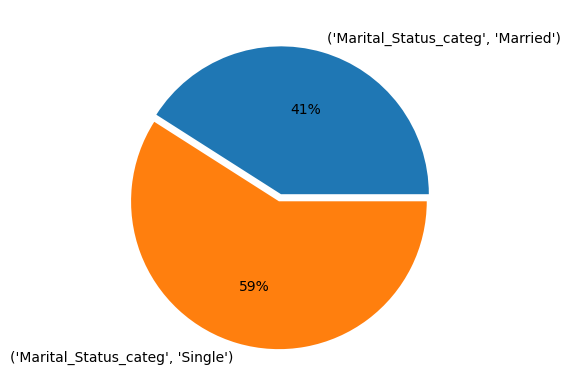

In [ ]:
Marital_Status = ['Marital_Status_categ']

df1=df[Marital_Status].melt().groupby(['variable','value'])[['value']].count()/len(df)

plt.pie(df1.value, labels=df1.index,explode=[0,0.05],autopct='%.0f%%')
plt.show()

### INFERENCE:
59% of customers are **Single**

#### HISTPLOT

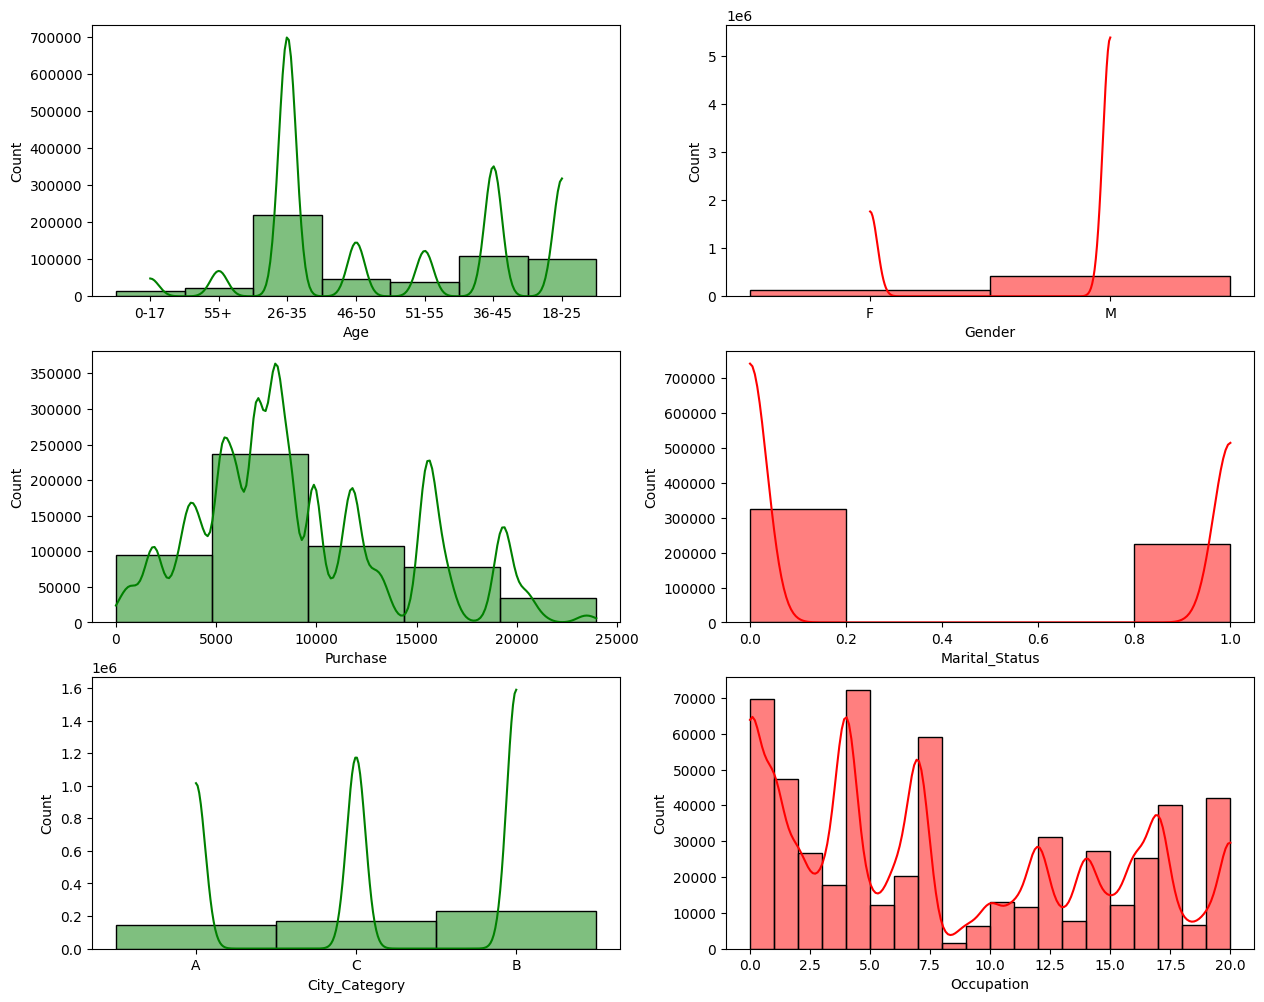

In [ ]:
# plotting charts in subplots

plt.figure(figsize=(15,12))

plt.subplot(3,2,1)
sns.histplot(data = df, x='Age', kde=True, color='green', bins = 30)


plt.subplot(3,2,2)
sns.histplot(data = df, x='Gender', kde=True, color='red', bins = 10)


plt.subplot(3,2,3)
sns.histplot(data = df, x='Purchase', kde=True, color='green', bins = 5)

plt.subplot(3,2,4)
sns.histplot(data = df, x='Marital_Status', kde=True, color='red', bins = 5)

plt.subplot(3,2,5)
sns.histplot(data = df, x='City_Category', kde=True, color='green', bins = 5)

plt.subplot(3,2,6)
sns.histplot(data = df, x='Occupation', kde=True, color='red', bins = 20)

plt.show()

### INFERENCE:
1. Most customers belong to the age group of **26-35** whereas the second most purchased age group is **36-45**
2. **Female** purchase more than male
3. Maximum purchased amount is around **23000**
4. Married customers count less than that of the **single** customers
5. Most customers are from** city_category B** followed by C
6. **Most** Customer belong to occupation **4** whereas **least** number of customer's occupation is **9**

### COUNTPLOT ANALYSIS:


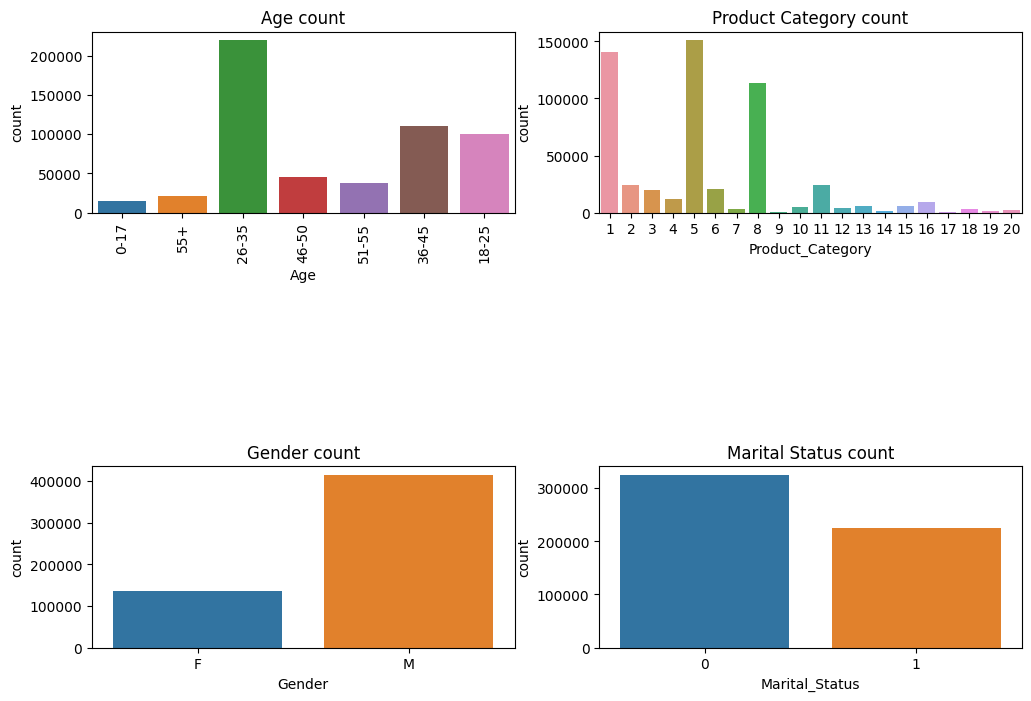

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
sns.countplot(data = df,x='Age')
plt.xticks(rotation =90)
plt.title('Age count')

plt.subplot(3,2,2)
sns.countplot(data = df,x='Product_Category')
plt.title('Product Category count')

plt.subplot(3,2,5)
sns.countplot(data = df,x='Gender')
plt.title('Gender count')

plt.subplot(3,2,6)
sns.countplot(data = df,x='Marital_Status')
plt.title('Marital Status count')

plt.show()


### INFERENCE:
The above analysis gives the clear visualisation of the parameters involved.

### BOXPLOT - CHECK FOR OUTLIERS


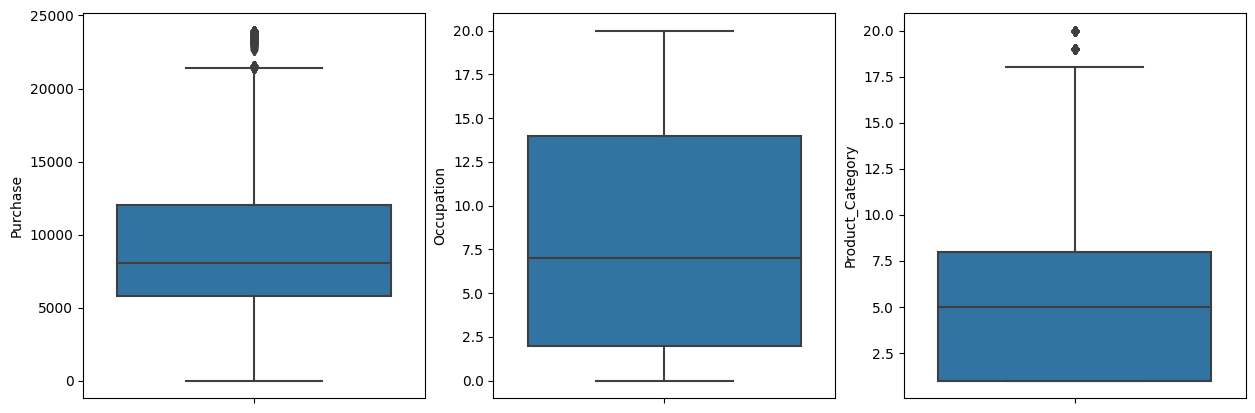

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data = df, y='Purchase',orient='v')

plt.subplot(1,3,2)
sns.boxplot(data = df, y='Occupation',orient='v')

plt.subplot(1,3,3)
sns.boxplot(data = df, y='Product_Category',orient ='v')

plt.show()

# INFERENCE:
1. Average Purchase value is approximately around **7000** with a ver few outliers
2. There is no outliers in case of occupation
3. Mostly brought product category is **5** and outliers at  **18** and **20**


Even one outlier can have a great impact in the range of Dataset and its mean.

Range of Data is not Robust.

To overcome the issues in Range we can use IQR(Integrated Quartile Range).

IQR is defined as difference between 75th percentile and 25th percentile.

**IQR = 75% -25%**

From the outlier plot involving purchase we can observe the below values,

25% = 100
50% = 8000
75% = 22000

Now,
  IQR = 75% - 25% which is around 21000.

Thereby overcoming the problem of Range issues.
    



### BIVARIATE ANALYSIS:

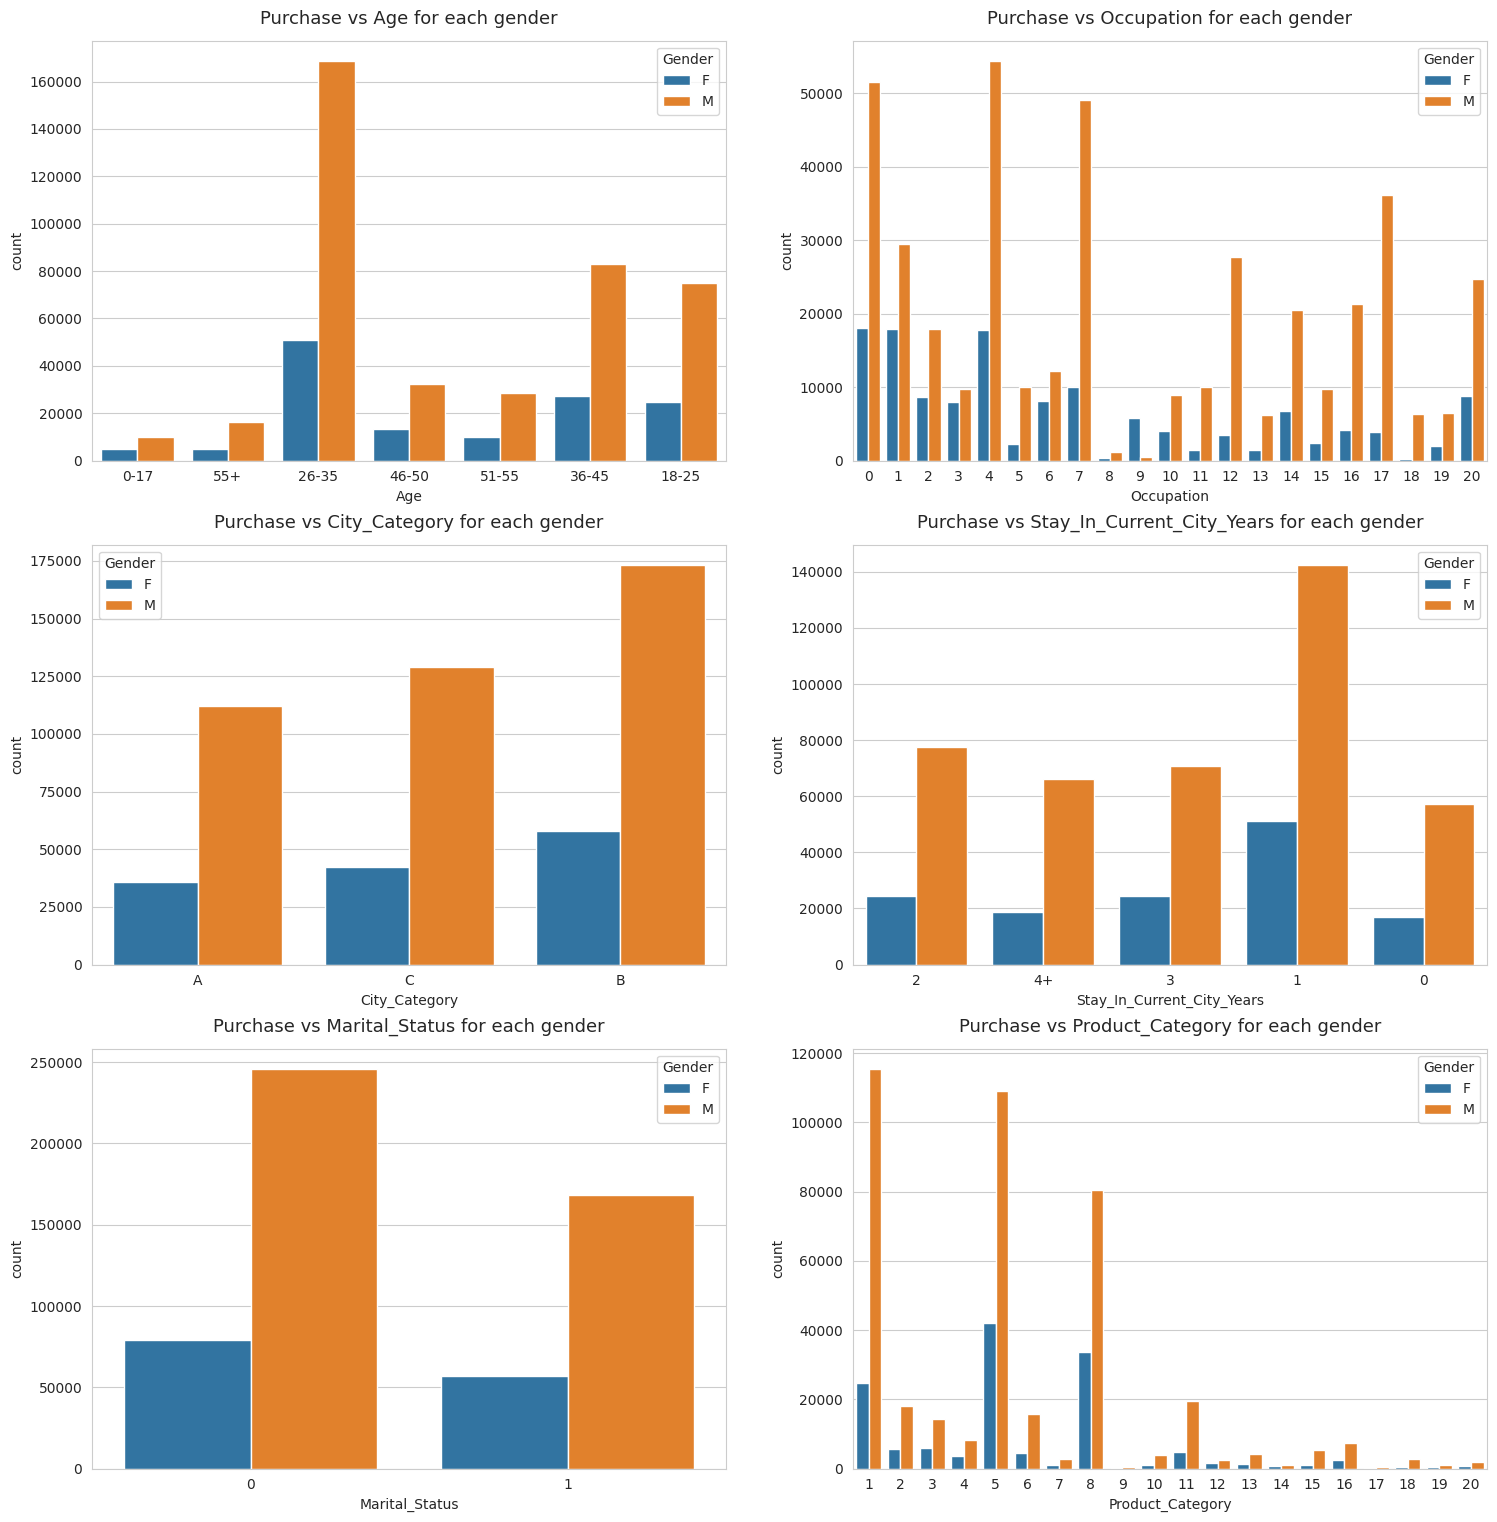

In [ ]:
attributes = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("whitegrid")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.countplot(data=df, x=attributes[count], hue='Gender',ax=axs[row, col])
        axs[row,col].set_title(f"Purchase vs {attributes[count]} for each gender", pad=12, fontsize=13)
        count += 1
plt.show()


### INFERENCES:
Here is yet another visual analysis which confirms the above mentioned fact that Men purchase more than women. Also we can observe,

1. Both Gender belonging to age group **26-35** spend more
2. **Male** whose Occupation **4** spend more and **Female** whose Occupation is **0,1 or 4** spend more
3. Both Gender from city category **B** purchase more
4. Customers who stay in the current city for **1 year** tend to purchase more irrespective of their
5. Irrespective of their gender, **Single** customers purchase a lot
6. **Male** are interested in product category **1** where as **Female** are interested in product category **5**

### MULTIVARIANT ANALYSIS:

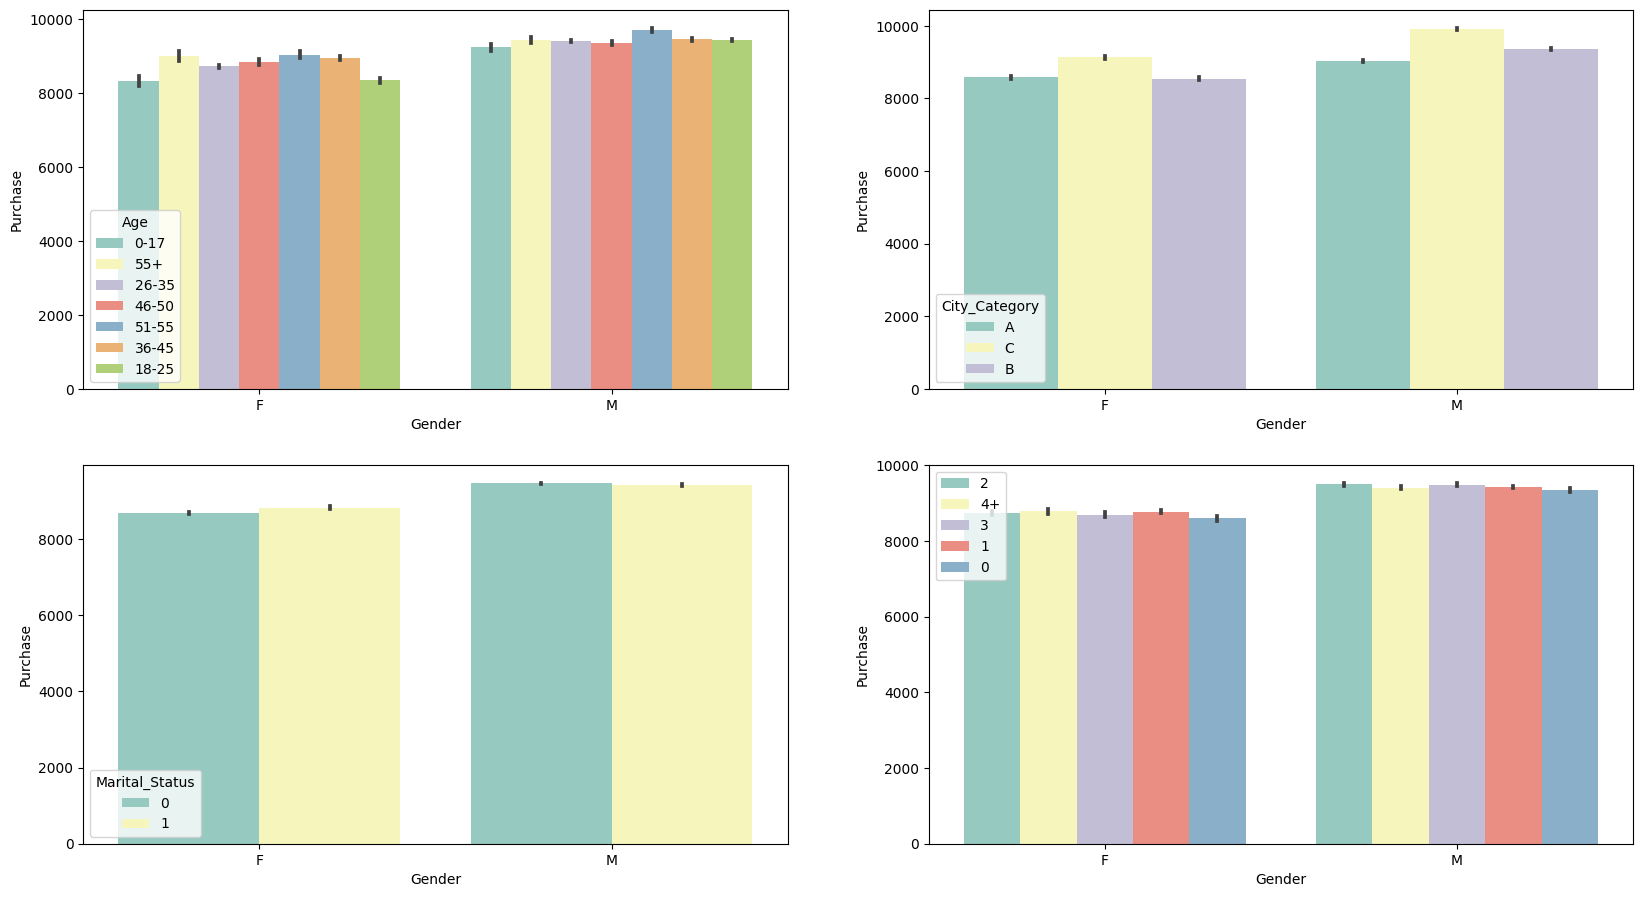

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.barplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.barplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.barplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.barplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

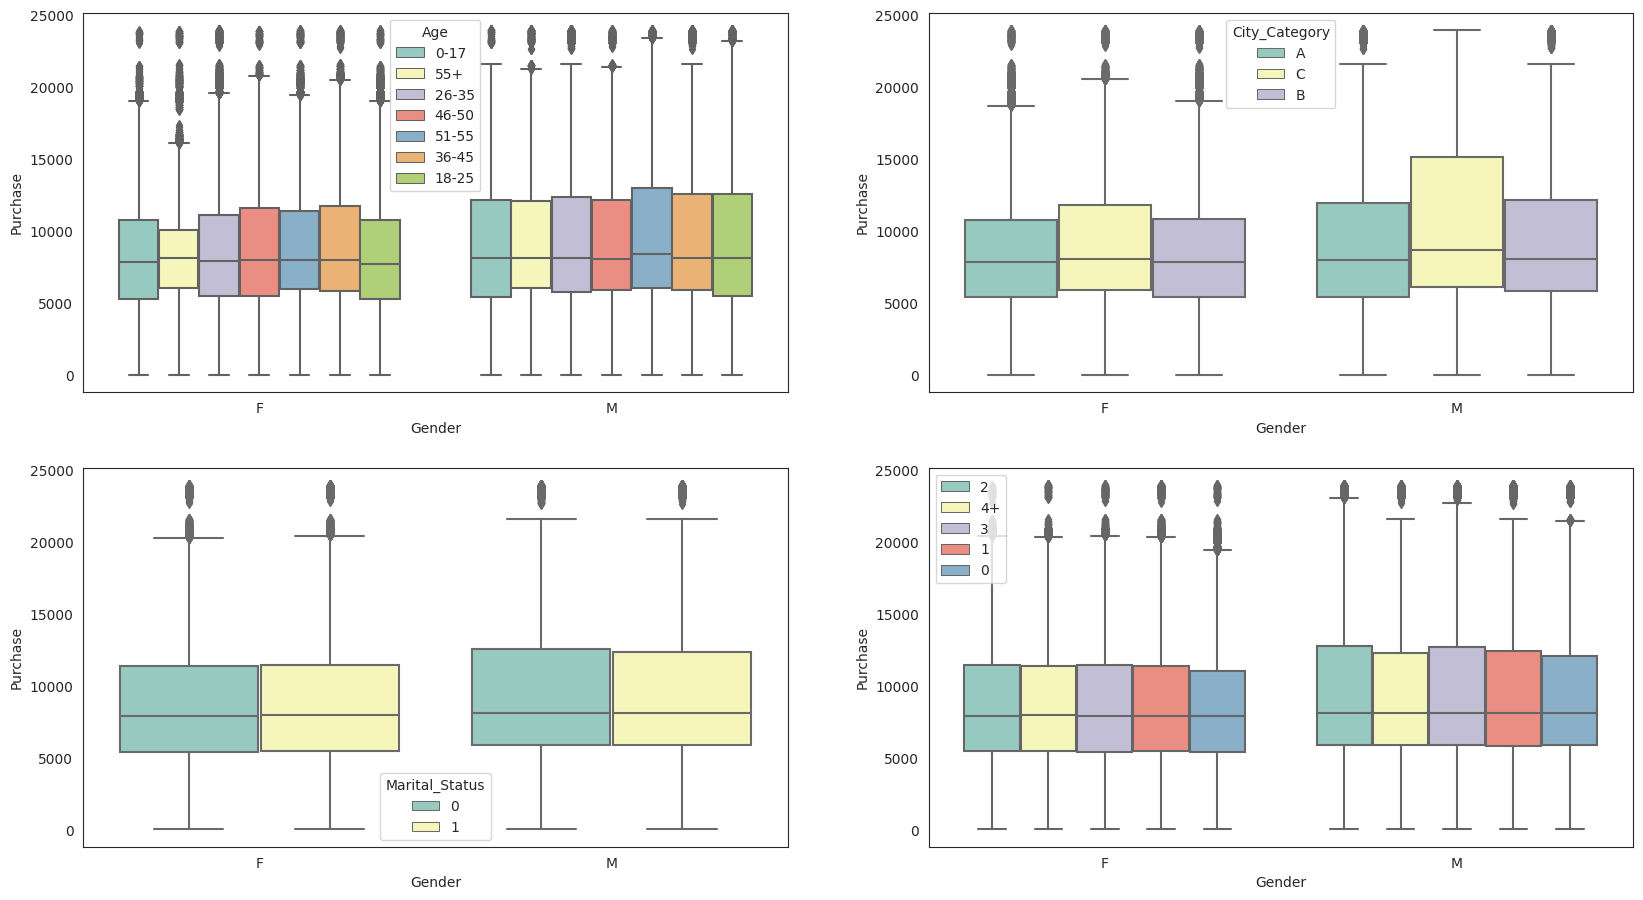

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

### INFERENCE:
**1. FEMALE:**
1. Majority number of purchases are done by those belonging to age category of** 55+**
2. City category **C** hits the more number of purchases
3. **Married** female just overtakes the single female in terms of number of purchases
4. Those who stay for **more than 4 years** purchase more often than others

**2. MALE:**
1. Majority number of purchases are done by those belonging to age category of** 51-55**
2. City category **C** hits the more number of purchases
3. Botn **married**  and **single** male contribute the same in terms of number of purchases
4. Those who stay for **2 years** purchase just a little more often than others


### HEATMAP

<ipython-input-29-d8d28ea6e5da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='Greens',annot = True)


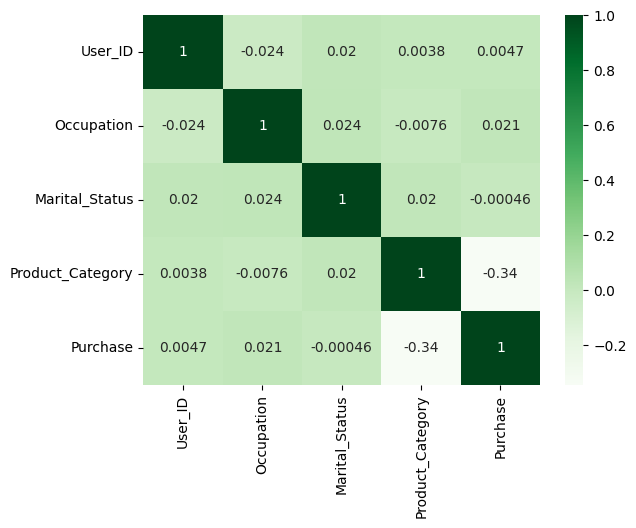

In [ ]:
sns.heatmap(df.corr(),cmap='Greens',annot = True)
plt.show()

### INFERENCE:
Most attributes are categorical so, correlation between then wont give an effective idea.

### PAIRPLOT

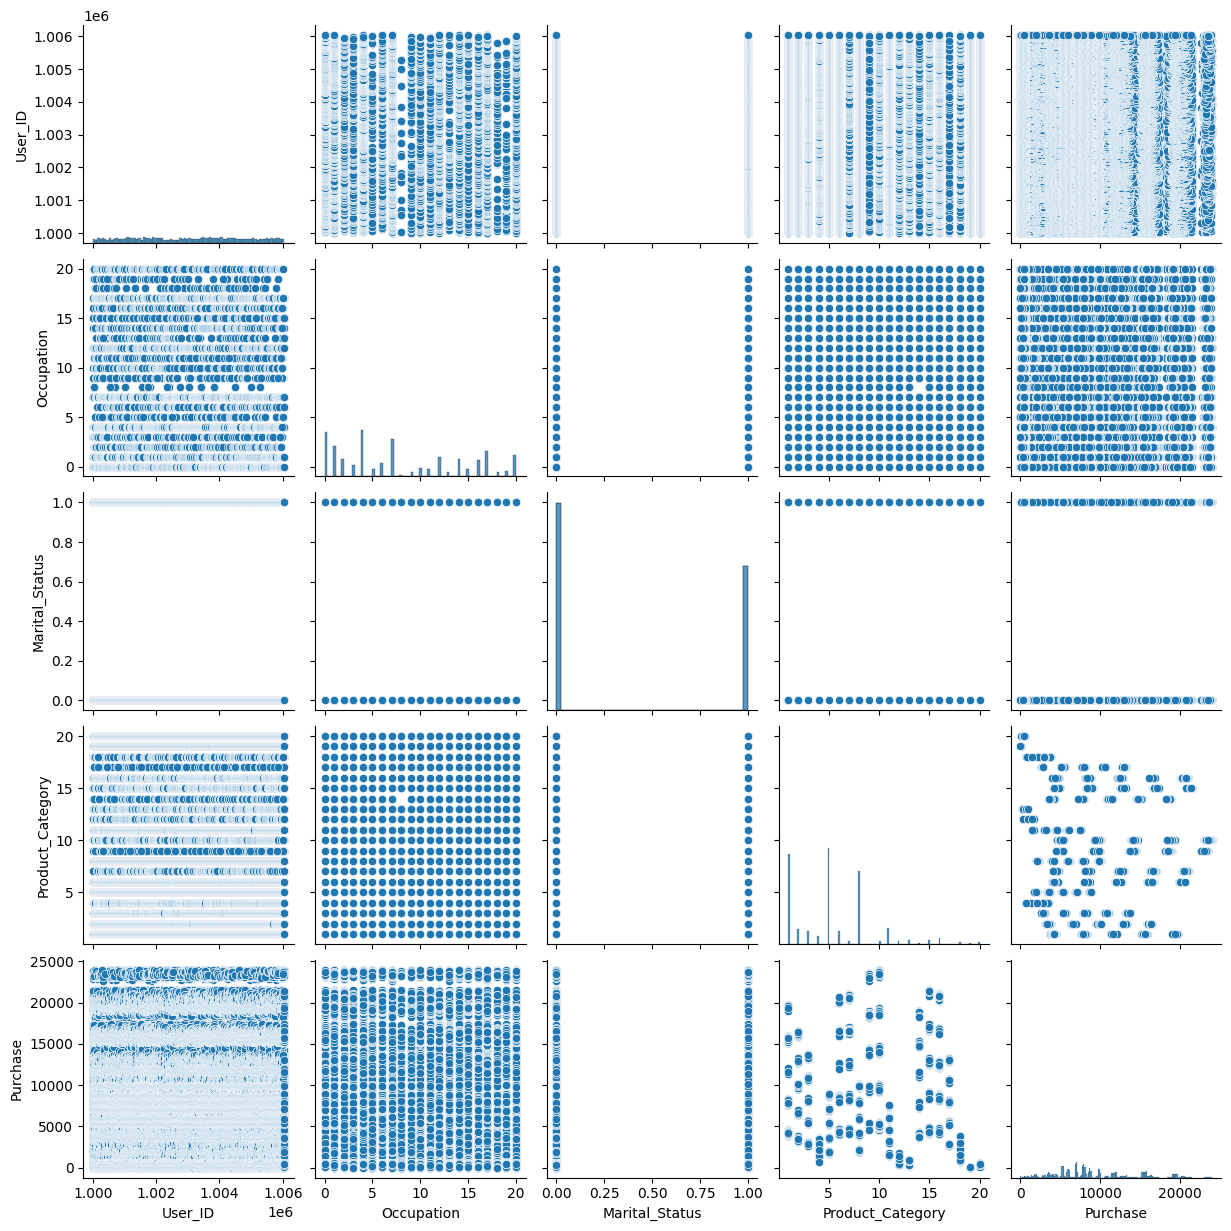

In [ ]:
sns.pairplot(data = df)

### INFERENCE:
The above pairplot clearly states that moost attributes are categorical and their dependencies upon each other cant be given by pairplots.


## DETECTING DATA OF OUTLIER VALUES


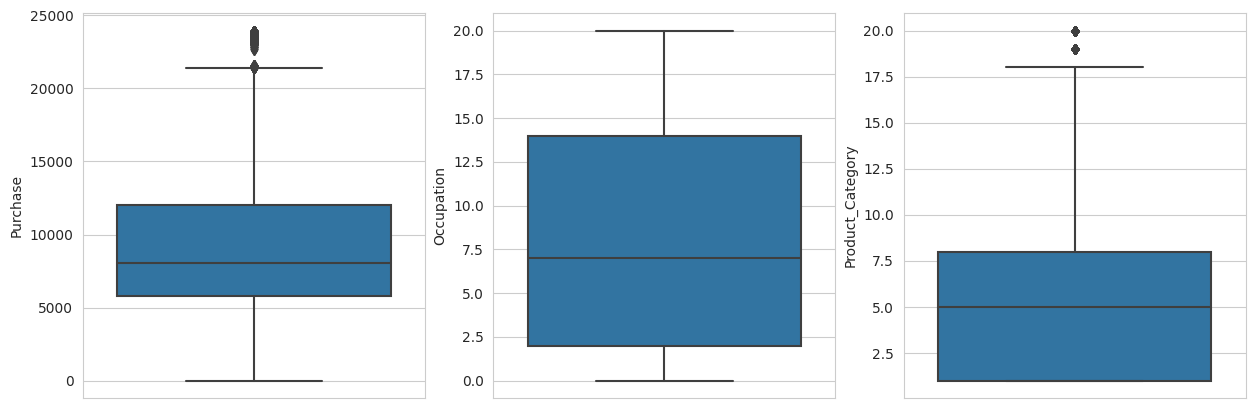

In [ ]:
sns.set_style(style='whitegrid')

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data = df, y='Purchase',orient='v')

plt.subplot(1,3,2)
sns.boxplot(data = df, y='Occupation',orient='v')

plt.subplot(1,3,3)
sns.boxplot(data = df, y='Product_Category',orient ='v')

plt.show()

#### DATA OF OUTLIERS IN PURCHASE COLUMN


In [ ]:
df[df['Purchase']>21000]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
731,1000139,P00020142,F,26-35,20,C,2,0,7,21002
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
...,...,...,...,...,...,...,...,...,...,...
545101,1005915,P00174242,M,18-25,4,C,0,0,15,21101
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663
545664,1006002,P00071442,M,51-55,0,C,1,1,15,21310
545787,1006018,P00052842,M,36-45,1,C,3,0,10,23496


#### DATA OF OUTLIERS IN PRODUCT CATEGORY COLUMN


In [ ]:
df[df['Product_Category']>18]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
545915,1000001,P00375436,F,0-17,10,A,2,0,20,612
545916,1000002,P00372445,M,55+,16,C,4+,0,20,119
545917,1000004,P00375436,M,46-50,7,B,2,1,20,481
545918,1000006,P00375436,F,51-55,9,A,1,0,20,480
545919,1000007,P00372445,M,36-45,1,B,1,1,20,241
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### INFERENCE:
1. There is no outliers in occupation column
2. On the contrary, there are a lot of outliers in case of **purchase** and **product_category**

### CONDITIONAL PROBABILITY:


### PROBABILITY OF PURCHASE MORE THAN AVERAGE FOR A GIVEN PARAMETER


In [ ]:
average=df['Purchase'].mean()

df['Marital_Status_categ'].where(df['Purchase']>=average).value_counts()

Single     129299
Married     89710
Name: Marital_Status_categ, dtype: int64

In [ ]:
df['Stay_In_Current_City_Years'].where(df['Purchase']>=average).value_counts()

1     77143
2     40934
3     37860
4+    33941
0     29131
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
df['Occupation'].where(df['Purchase']>=average).value_counts()


4.0     28412
0.0     27029
7.0     24321
17.0    18262
1.0     17521
12.0    13784
20.0    11965
14.0    11380
16.0    10369
2.0      9784
6.0      8061
3.0      6800
15.0     5287
5.0      4990
10.0     4973
11.0     4496
13.0     3123
19.0     2966
18.0     2631
9.0      2164
8.0       691
Name: Occupation, dtype: int64

In [ ]:
df['Age'].where(df['Purchase']>=average).value_counts()


26-35    86784
36-45    44538
18-25    38996
46-50    17910
51-55    16193
55+       8838
0-17      5750
Name: Age, dtype: int64

In [ ]:
df['Gender'].where(df['Purchase']>=average).value_counts()


M    171753
F     47256
Name: Gender, dtype: int64

In [ ]:
df['City_Category'].where(df['Purchase']>=average).value_counts()


B    90015
C    74725
A    54269
Name: City_Category, dtype: int64

### INFERENCE :
The details of customers whose purchase is greater than average purchase is given below:

1. **Single** customer's **(129299)** average purchase is more than that of **married** customers**(89710)**
2. Customers who stay in the current city for **a year** contribute the **most** whereas who stay for **less than a year** contribute the **least**
3. Customers whose occupation is **4** purchase **more** than others then comes **0** and **7** whereas occupation **8** contributes the **least**
4. Age group of customer who purchase a **lot** is **26-35** and the **least** is **0 -17**
5. **Male** spend more than Female
6. Customers from city **B** purchase more than others

In [ ]:
df.groupby('Age').agg({'Age':'count'}). rename(columns ={'Age':'Age','Age':'Count'}).reset_index().sort_values('Count',ascending = False)


,Age,Count
2,26-35,219587
3,36-45,110013
1,18-25,99660
4,46-50,45701
5,51-55,38501
6,55+,21504
0,0-17,15102


## 1.Are women spending more money per transaction than men? Why or Why not?

In [ ]:
df_gender = df.groupby(['User_ID','Gender']).agg({'Purchase':'sum'}).reset_index()
df_gender.sample(5)


,User_ID,Gender,Purchase
1891,1001947,M,762558
1301,1001343,M,1621007
283,1000289,F,457657
5696,1005844,F,476231
5630,1005777,M,740452


In [ ]:
gender_count = df_gender['Gender'].value_counts()
gender_count

M    4225
F    1666
Name: Gender, dtype: int64

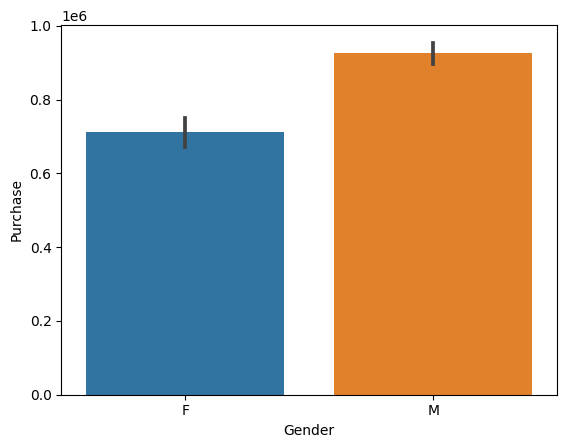

In [ ]:
sns.barplot(data = df_gender, x='Gender', y='Purchase')
plt.show()

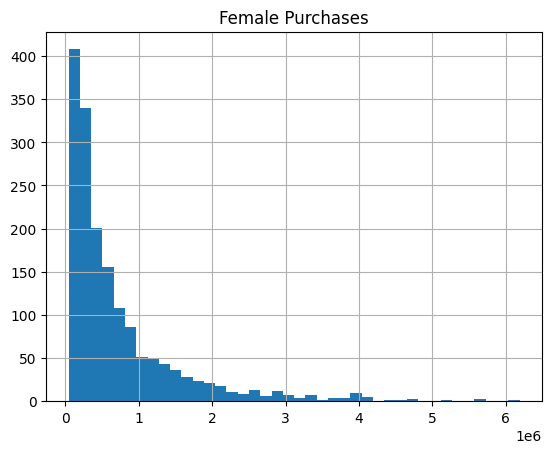

In [ ]:

df_gender[df_gender['Gender']=='F']['Purchase'].hist(bins=40)
plt.title('Female Purchases')


plt.show()

Text(0.5, 1.0, 'Male Purchases')

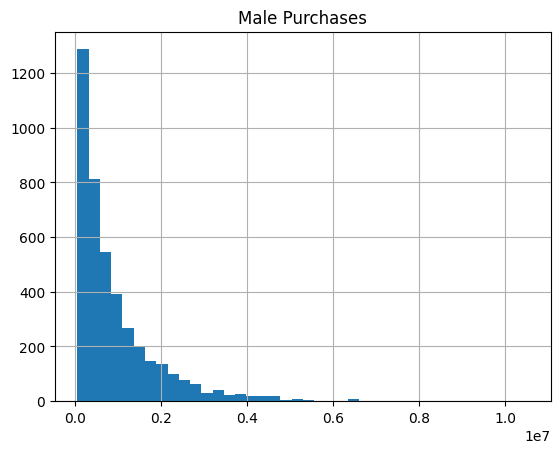

In [ ]:
df_gender[df_gender['Gender']=='M']['Purchase'].hist(bins=40)
plt.title('Male Purchases')


In [ ]:
df_gender1 = df_gender.groupby(['Gender']).agg({'Purchase':'mean'}).reset_index().rename(columns={'Purchase':'Average_Purchase'})
df_gender1

,Gender,Average_Purchase
0,F,712024.394958
1,M,925344.402367


### INFERENCE:
It is clearly evident that Men purchased more than women interms of total amount spent or no of products brought.
So, **Average purchase** of **men(~=925344)** is more than that of **women(~=712024)**.

## 2.Confidence intervals and distribution of the mean of the expenses by female and male customers

Distribution (Kdeplot) of the expenses of male and female customers:

<Axes: xlabel='Purchase', ylabel='Density'>

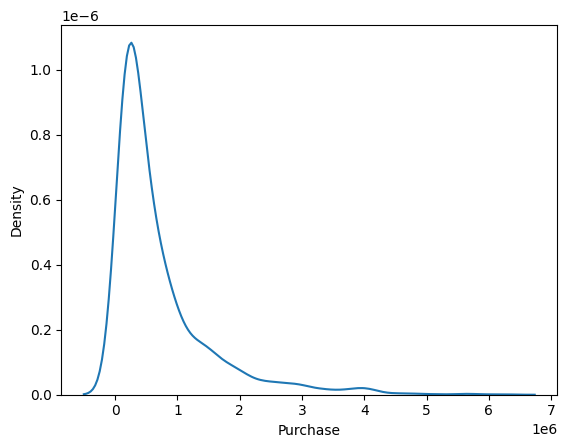

In [ ]:
df_female = df_gender[df_gender['Gender']=='F'][['Purchase']]
sns.kdeplot(df_female['Purchase'])


<Axes: xlabel='Purchase', ylabel='Density'>

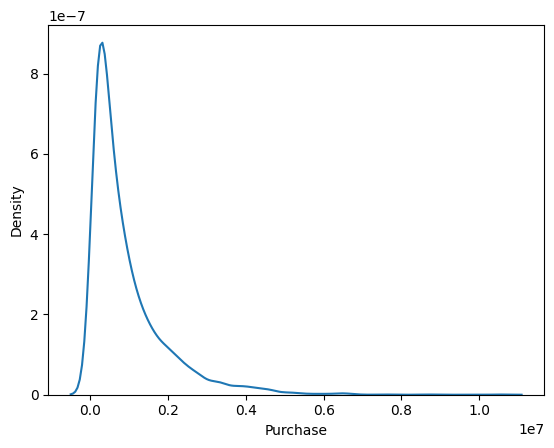

In [ ]:
df_male = df_gender[df_gender['Gender']=='M'][['Purchase']]

sns.kdeplot(df_male['Purchase'])


### INFERENCE:
The Kdeplot shows that the **distribution is not normal** or gaussian. so we take **sampling distribution of sample means** which follows normal distribution to **perform CLT** to get confidence interval

## CENTRAL LIMIT THEOREM - TO GET CONFIDENCE INTERVAL

In [ ]:
sampling_df_female = [df_female['Purchase'].sample(100000,replace='True').mean() for _ in range(1000)]
sampling_df_male = [df_male['Purchase'].sample(100000,replace='True').mean() for _ in range(1000)]

<Axes: ylabel='Density'>

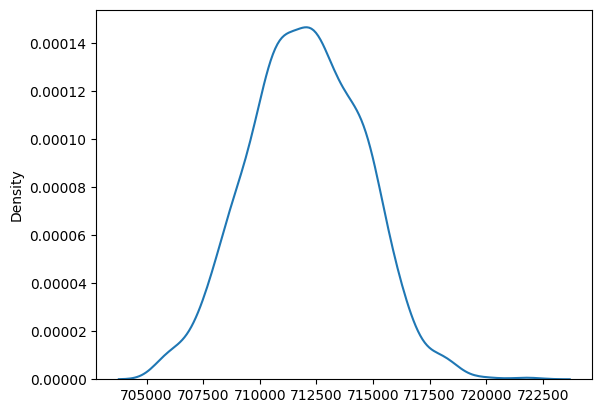

In [ ]:
sampling_df_female = pd.Series(sampling_df_female)
sns.kdeplot(sampling_df_female)

<Axes: ylabel='Density'>

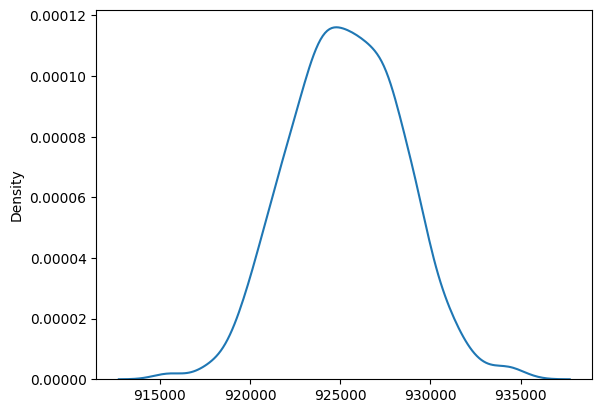

In [ ]:
sampling_df_male = pd.Series(sampling_df_male)

sns.kdeplot(sampling_df_male)


In [ ]:
np.mean(sampling_df_female)

712034.0230193799

In [ ]:
np.std(sampling_df_female)

2504.1451389941653

In [ ]:
np.mean(sampling_df_male)

925333.72352391

In [ ]:
np.std(sampling_df_male)

3137.2283436803896

### Analysis of average purchase values by gender with 90% confidence

In [ ]:
gender = ['M','F']

for i in range(len(gender)):
  if gender[i] == 'M':
    print('CI - Male Customers for 90% confidence')
    print(round(norm(np.mean(sampling_df_male),np.std(sampling_df_male)).ppf(0.05),2), ',', round(norm(np.mean(sampling_df_male),np.std(sampling_df_male)).ppf(0.95),2))
  else:
    print('CI - Female Customers for 90% confidence')
    print(round(norm(np.mean(sampling_df_female),np.std(sampling_df_female)).ppf(0.05),2), ',', round(norm(np.mean(sampling_df_female),np.std(sampling_df_female)).ppf(0.95),2))


CI - Male Customers for 90% confidence
920173.44 , 930494.0
CI - Female Customers for 90% confidence
707915.07 , 716152.98


### Analysis of average purchase values by gender with 95% confidence


In [ ]:
gender = ['M','F']

for i in range(len(gender)):
  if gender[i] == 'M':
    print('CI - Male Customers for 95% confidence')
    print(round(norm(np.mean(sampling_df_male),np.std(sampling_df_male)).ppf(0.025),2), ',', round(norm(np.mean(sampling_df_male),np.std(sampling_df_male)).ppf(0.975),2))
  else:
    print('CI - Female Customers for 95% confidence')
    print(round(norm(np.mean(sampling_df_female),np.std(sampling_df_female)).ppf(0.025),2), ',', round(norm(np.mean(sampling_df_female),np.std(sampling_df_female)).ppf(0.975),2))


CI - Male Customers for 95% confidence
919184.87 , 931482.58
CI - Female Customers for 95% confidence
707125.99 , 716942.06


### Analysis of average purchase values by gender with 99% confidence


In [ ]:
gender = ['M','F']

for i in range(len(gender)):
  if gender[i] == 'M':
    print('CI - Male Customers for 99% confidence')
    print(round(norm(np.mean(sampling_df_male),np.std(sampling_df_male)).ppf(0.005),2), ',', round(norm(np.mean(sampling_df_male),np.std(sampling_df_male)).ppf(0.995),2))
  else:
    print('CI - Female Customers for 99% confidence')
    print(round(norm(np.mean(sampling_df_female),np.std(sampling_df_female)).ppf(0.005),2), ',', round(norm(np.mean(sampling_df_female),np.std(sampling_df_female)).ppf(0.995),2))


CI - Male Customers for 99% confidence
917252.76 , 933414.69
CI - Female Customers for 99% confidence
705583.77 , 718484.27


### INFERENCE:
Based on mean expanses we observe that,

1. For **Male**:
  1. **90%** Confidence interval range - [920173.44 , 930494.0]
  2. **95%** Confidence interval range - [919184.87 , 931482.58]
  3. **99%** Confidence interval range - [917252.76 , 933414.69]

2. For **Female**:
  1. **90%** Confidence interval range - [707915.07 , 716152.98]
  2. **95%** Confidence interval range - [707125.99 , 716942.06]
  3. **99%** Confidence interval range - [705583.77 , 718484.27]


##3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [ ]:
n=[10,100,1000,100000]
gender = ['M','F']


for i in range(len(n)):
  sampling_df_female = [df_female['Purchase'].sample(n[i],replace='True').mean() for _ in range(1000)]
  sampling_df_male = [df_male['Purchase'].sample(n[i],replace='True').mean() for _ in range(1000)]

  for j in range(len(gender)):
    if gender[j] == 'M':
      print('CI - Male Customers for 95% confidence with sample size',n[i])
      print(round(norm(np.mean(sampling_df_male),np.std(sampling_df_male)).ppf(0.025),2), ',', round(norm(np.mean(sampling_df_male),np.std(sampling_df_male)).ppf(0.975),2))
    else:
      print('CI - Female Customers for 95% confidence with sample size', n[i])
      print(round(norm(np.mean(sampling_df_female),np.std(sampling_df_female)).ppf(0.025),2), ',', round(norm(np.mean(sampling_df_female),np.std(sampling_df_female)).ppf(0.975),2))



CI - Male Customers for 95% confidence with sample size 10
336383.56 , 1486803.06
CI - Female Customers for 95% confidence with sample size 10
230504.21 , 1162337.64
CI - Male Customers for 95% confidence with sample size 100
732690.74 , 1117507.95
CI - Female Customers for 95% confidence with sample size 100
556328.71 , 875023.01
CI - Male Customers for 95% confidence with sample size 1000
864306.86 , 984992.57
CI - Female Customers for 95% confidence with sample size 1000
664440.84 , 760932.51
CI - Male Customers for 95% confidence with sample size 100000
919461.82 , 931512.4
CI - Female Customers for 95% confidence with sample size 100000
706793.04 , 717166.15


We can observe that for **95**% confidence interval,

1. For sample size **10**:
  1. Male -  [336383.56 , 1486803.06]
  2. Female - [230504.21 , 1162337.64]

For Sample size 10 the confidence interval for both Male and Female is **overlapping**

and as the **sample size increases**, we can see the **interval** ranges **seperating** and then finally they both **dont overalap**.

2. For sample size **100000**:
  1. Male -  [919461.82 , 931512.4]
  2. Female - [706793.04 , 717166.15]

For Sample size 100000 the confidence interval for both Male and Female is now **not overlapping**.



CI - Male Customers for 90% confidence with sample size 10
398239.18 , 1460303.15
CI - Female Customers for 90% confidence with sample size 10
272905.21 , 1120068.76


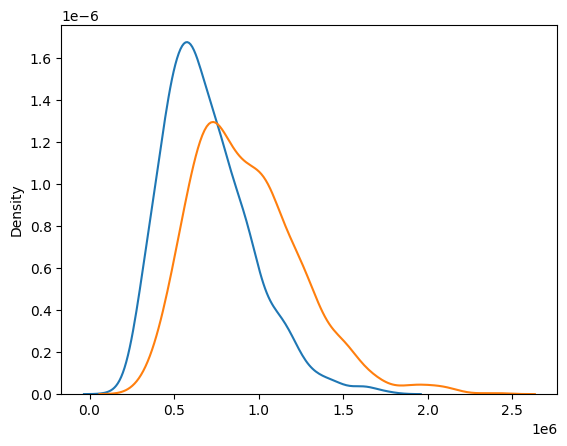

CI - Male Customers for 90% confidence with sample size 100
762852.0 , 1077805.81
CI - Female Customers for 90% confidence with sample size 100
581249.8 , 836339.58


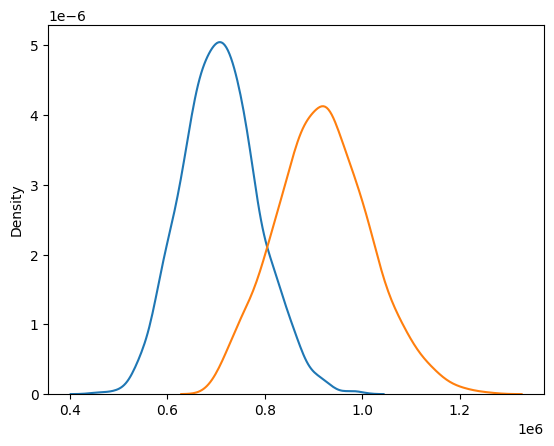

CI - Male Customers for 90% confidence with sample size 1000
875557.31 , 975610.15
CI - Female Customers for 90% confidence with sample size 1000
671450.44 , 753348.71


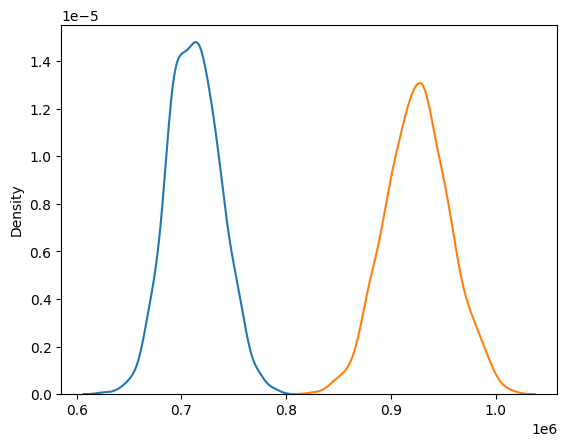

CI - Male Customers for 90% confidence with sample size 100000
920079.41 , 930430.46
CI - Female Customers for 90% confidence with sample size 100000
707807.03 , 716352.97


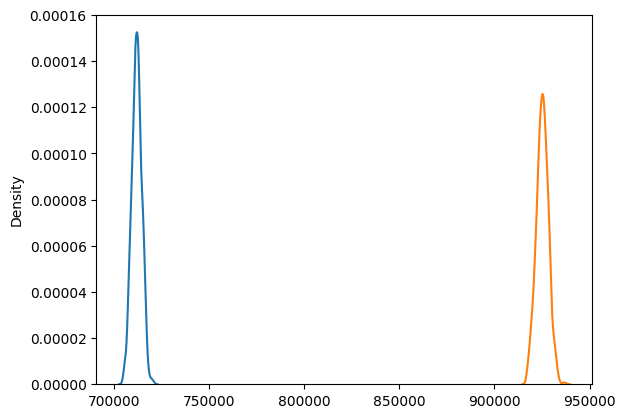

In [ ]:
n=[10,100,1000,100000]
gender = ['M','F']


for i in range(len(n)):
  sampling_df_female = [df_female['Purchase'].sample(n[i],replace='True').mean() for _ in range(1000)]
  sampling_df_male = [df_male['Purchase'].sample(n[i],replace='True').mean() for _ in range(1000)]

  for j in range(len(gender)):
    if gender[j] == 'M':
      print('CI - Male Customers for 90% confidence with sample size',n[i])
      print(round(norm(np.mean(sampling_df_male),np.std(sampling_df_male)).ppf(0.05),2), ',', round(norm(np.mean(sampling_df_male),np.std(sampling_df_male)).ppf(0.95),2))

    else:
      print('CI - Female Customers for 90% confidence with sample size', n[i])
      print(round(norm(np.mean(sampling_df_female),np.std(sampling_df_female)).ppf(0.05),2), ',', round(norm(np.mean(sampling_df_female),np.std(sampling_df_female)).ppf(0.95),2))


  sns.kdeplot(data = sampling_df_female)
  sns.kdeplot(data = sampling_df_male)
  plt.show()

### INFERENCE:
The above graphs are the visual confirmation about the fact that as sample size increases the overlapping fades away.

So, to do business analysis Walmart has to involve in analysing samples of bigger sizes.


### CONCLUSION TO MAKE CHANGES:
Its clearly evident that female customers spend  much lesser than male so company has to focus on products that attracts more female customers and increase their spendings.

## 4. Results when the same activity is performed for Married vs Unmarried

In [ ]:
df_marital_status = df.groupby(['User_ID','Marital_Status'])[['Purchase']].agg({'Purchase':'sum'}).reset_index()
df_marital_status.sample(5)

,User_ID,Marital_Status,Purchase
1651,1001700,0,221795
5267,1005406,1,462689
687,1000709,0,272784
1144,1001183,0,970956
4260,1004373,1,1770654


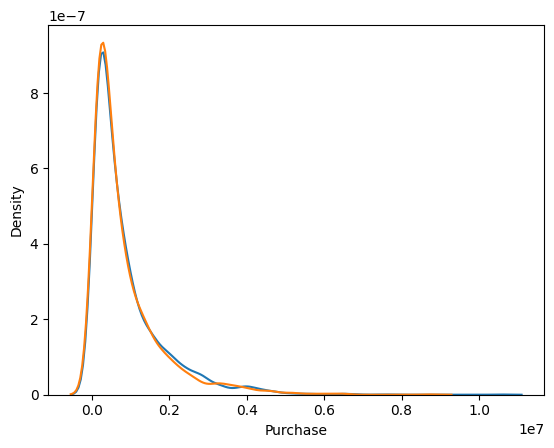

In [ ]:
df_single = df_marital_status[df_marital_status['Marital_Status']==0][['Purchase']]
df_married = df_marital_status[df_marital_status['Marital_Status']==1][['Purchase']]


sns.kdeplot(df_single['Purchase'])
sns.kdeplot(df_married['Purchase'])
plt.show()



### INFERENCE:
The Kdeplot shows that the **distribution is not normal** or gaussian. so we take **sampling distribution of sample means** which follows normal distribution to **perform CLT** to get confidence interval

### Analysis of average purchase values by marital status with 90% confidence


In [ ]:
sampling_df_single = [df_single['Purchase'].sample(100000,replace='True').mean() for _ in range(1000)]
sampling_df_married = [df_married['Purchase'].sample(100000,replace="True").mean() for _ in range(1000)]


In [ ]:
marital_status = [0,1]

for i in range(len(marital_status)):
  if marital_status[i] == 0:
    print('CI - Unmarried Customers for 90% confidence')
    print(round(norm(np.mean(sampling_df_single),np.std(sampling_df_single)).ppf(0.05),2), ',', round(norm(np.mean(sampling_df_single),np.std(sampling_df_single)).ppf(0.95),2))
  else:
    print('CI - Married Customers for 90% confidence')
    print(round(norm(np.mean(sampling_df_married),np.std(sampling_df_married)).ppf(0.05),2), ',', round(norm(np.mean(sampling_df_married),np.std(sampling_df_married)).ppf(0.95),2))


CI - Unmarried Customers for 90% confidence
875551.66 , 885586.1
CI - Married Customers for 90% confidence
838763.13 , 848506.47


### Analysis of average purchase values by marital status with 95% confidence


In [ ]:
marital_status = [0,1]

for i in range(len(marital_status)):
  if marital_status[i] == 0:
    print('CI - Unmarried Customers for 95% confidence')
    print(round(norm(np.mean(sampling_df_single),np.std(sampling_df_single)).ppf(0.025),2), ',', round(norm(np.mean(sampling_df_single),np.std(sampling_df_single)).ppf(0.975),2))
  else:
    print('CI - Married Customers for 95% confidence')
    print(round(norm(np.mean(sampling_df_married),np.std(sampling_df_married)).ppf(0.025),2), ',', round(norm(np.mean(sampling_df_married),np.std(sampling_df_married)).ppf(0.975),2))


CI - Unmarried Customers for 95% confidence
874384.43 , 886694.53
CI - Married Customers for 95% confidence
837743.29 , 849155.68


### Analysis of average purchase values by marital status with 99% confidence


In [ ]:
marital_status = [0,1]

for i in range(len(marital_status)):
  if marital_status[i] == 0:
    print('CI - Unmarried Customers for 99% confidence')
    print(round(norm(np.mean(sampling_df_single),np.std(sampling_df_single)).ppf(0.005),2), ',', round(norm(np.mean(sampling_df_single),np.std(sampling_df_single)).ppf(0.995),2))
  else:
    print('CI - Married Customers for 99% confidence')
    print(round(norm(np.mean(sampling_df_married),np.std(sampling_df_married)).ppf(0.005),2), ',', round(norm(np.mean(sampling_df_married),np.std(sampling_df_married)).ppf(0.995),2))


CI - Unmarried Customers for 99% confidence
872450.38 , 888628.58
CI - Married Customers for 99% confidence
835950.28 , 850948.7


### INFERENCE:
Based on mean expanses we observe that,

1. For **Single**:
  1. **90%** Confidence interval range - [875551.66 , 885586.1]
  2. **95%** Confidence interval range - [874384.43 , 886694.53]
  3. **99%** Confidence interval range - [872450.38 , 888628.58]

2. For **Married**:
  1. **90%** Confidence interval range - [838763.13 , 848506.47]
  2. **95%** Confidence interval range - [837743.29 , 849155.68]
  3. **99%** Confidence interval range - [835950.28 , 850948.7]


## To check for overlapping

In [ ]:
n=[10,100,1000,100000]
marital_status = [0,1]


for i in range(len(n)):
  sampling_df_single = [df_single['Purchase'].sample(n[i],replace='True').mean() for _ in range(1000)]
  sampling_df_married = [df_married['Purchase'].sample(n[i],replace='True').mean() for _ in range(1000)]

  for j in range(len(marital_status)):
    if marital_status[j] == 0:
      print('CI - Single Customers for 90% confidence with sample size',n[i])
      print(round(norm(np.mean(sampling_df_single),np.std(sampling_df_single)).ppf(0.05),2), ',', round(norm(np.mean(sampling_df_single),np.std(sampling_df_single)).ppf(0.95),2))
    else:
      print('CI - Married Customers for 90% confidence with sample size', n[i])
      print(round(norm(np.mean(sampling_df_married),np.std(sampling_df_married)).ppf(0.05),2), ',', round(norm(np.mean(sampling_df_married),np.std(sampling_df_married)).ppf(0.95),2))



CI - Single Customers for 90% confidence with sample size 10
367230.03 , 1368949.38
CI - Married Customers for 90% confidence with sample size 10
365940.17 , 1322729.0
CI - Single Customers for 90% confidence with sample size 100
720769.03 , 1032080.28
CI - Married Customers for 90% confidence with sample size 100
692075.18 , 997054.24
CI - Single Customers for 90% confidence with sample size 1000
829114.43 , 931893.02
CI - Married Customers for 90% confidence with sample size 1000
795454.36 , 894526.33
CI - Single Customers for 90% confidence with sample size 100000
875469.22 , 885467.44
CI - Married Customers for 90% confidence with sample size 100000
838780.52 , 848580.3


We can observe that for **90**% confidence interval,

1. For sample size **10**:
  1. Single -  [367230.03 , 1368949.38]
  2. Married - [365940.17 , 1322729.0]

For Sample size 10 the confidence interval for both Single and Married is **overlapping**

and as the **sample size increases**, we can see the **interval** ranges **seperating** and then finally they both **dont overalap**.

2. For sample size **100000**:
  1. Single -  [875469.22 , 885467.44]
  2. Married - [838780.52 , 848580.3]

For Sample size 100000 the confidence interval for both Single and Married is now **not overlapping**.


CI - Single Customers for 95% confidence with sample size 10
292672.72 , 1435888.8
CI - Married Customers for 95% confidence with sample size 10
264556.24 , 1451405.08


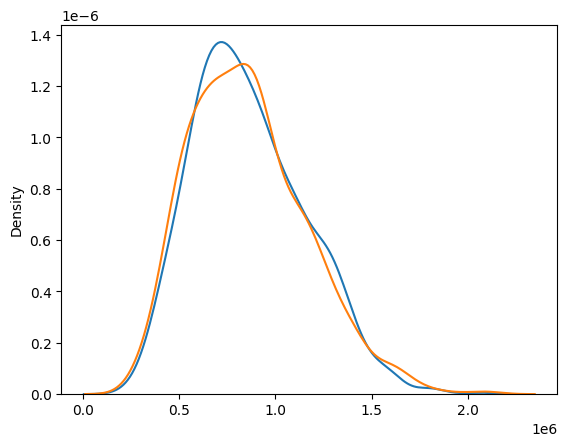

CI - Single Customers for 95% confidence with sample size 100
705111.43 , 1068126.31
CI - Married Customers for 95% confidence with sample size 100
653371.94 , 1024185.65


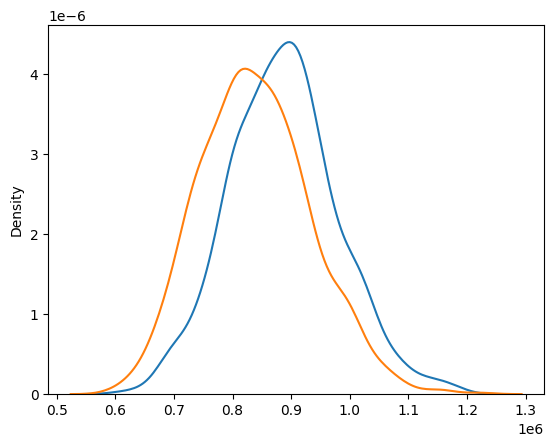

CI - Single Customers for 95% confidence with sample size 1000
821955.42 , 936808.69
CI - Married Customers for 95% confidence with sample size 1000
785560.56 , 900712.95


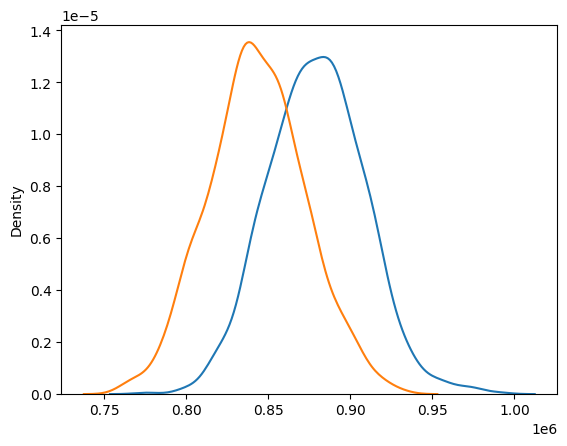

CI - Single Customers for 95% confidence with sample size 100000
874700.25 , 886721.58
CI - Married Customers for 95% confidence with sample size 100000
837626.59 , 849396.74


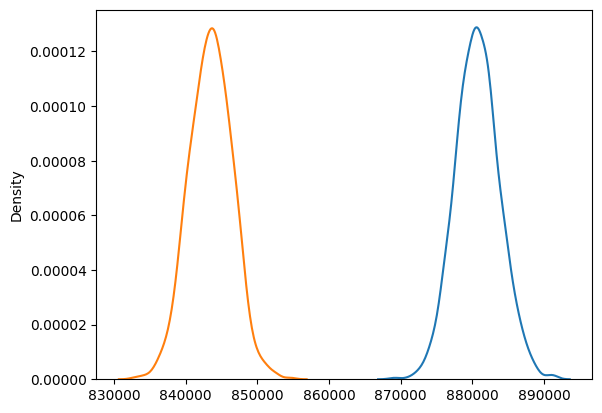

In [ ]:
n=[10,100,1000,100000]
marital_status = [0,1]


for i in range(len(n)):
  sampling_df_single = [df_single['Purchase'].sample(n[i],replace='True').mean() for _ in range(1000)]
  sampling_df_married = [df_married['Purchase'].sample(n[i],replace='True').mean() for _ in range(1000)]

  for j in range(len(marital_status)):
    if marital_status[j] == 0:
      print('CI - Single Customers for 95% confidence with sample size',n[i])
      print(round(norm(np.mean(sampling_df_single),np.std(sampling_df_single)).ppf(0.025),2), ',', round(norm(np.mean(sampling_df_single),np.std(sampling_df_single)).ppf(0.975),2))

    else:
      print('CI - Married Customers for 95% confidence with sample size', n[i])
      print(round(norm(np.mean(sampling_df_married),np.std(sampling_df_married)).ppf(0.025),2), ',', round(norm(np.mean(sampling_df_married),np.std(sampling_df_married)).ppf(0.975),2))


  sns.kdeplot(data = sampling_df_single)
  sns.kdeplot(data = sampling_df_married)
  plt.show()

### INFERENCE:
The above graphs are the visual confirmation about the fact that as sample size increases the overlapping fades away.

### CONCLUSION TO MAKE CHANGES:
Its obvious that married customers spend less. Taking steps to improve their purchase rate will contribute to the positive side for the company

## 5. Results when the same activity is performed for Age

In [ ]:
df_age = df.groupby(['User_ID','Age'])[['Purchase']].agg({'Purchase':'sum'}).reset_index()
df_age.sample(5)

,User_ID,Age,Purchase
582,1000598,36-45,160192
2629,1002705,26-35,180128
3389,1003483,46-50,4002639
1956,1002013,46-50,464609
2097,1002157,18-25,669912


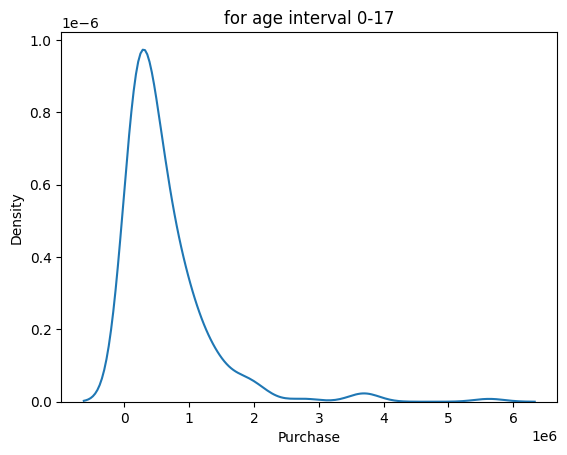

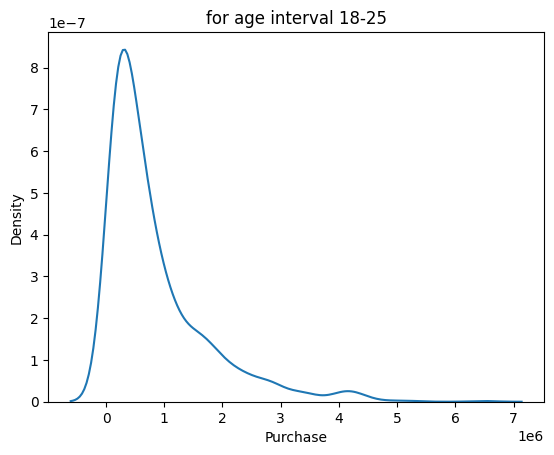

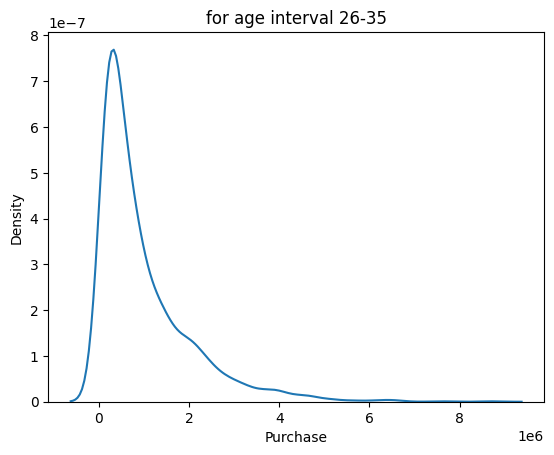

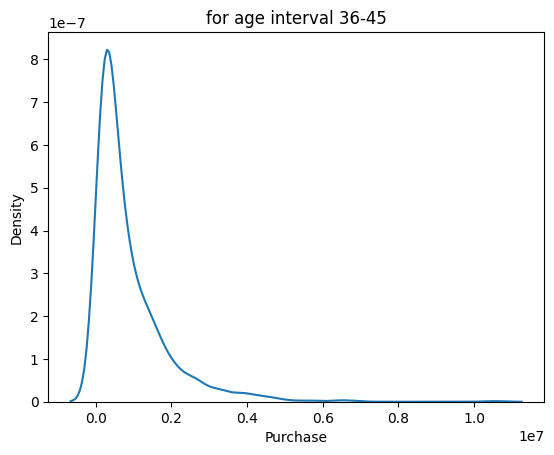

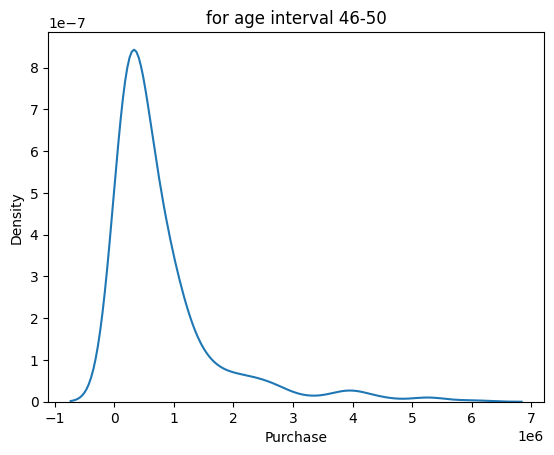

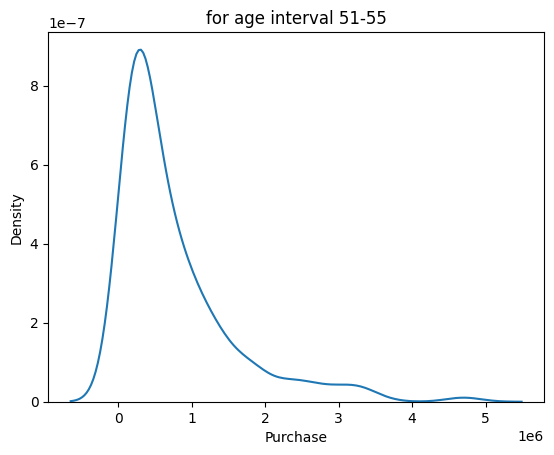

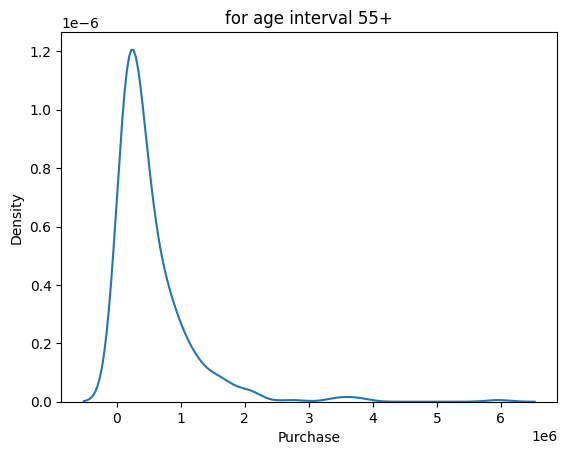

In [ ]:
age_interval = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


for i in range(len(age_interval)):
  df_age1 = df_age[df_age['Age']==age_interval[i]][['Purchase']]
  sns.kdeplot(df_age1['Purchase'])
  plt.title(f'for age interval {age_interval[i]}')
  plt.show()

### INFERENCE:
The Kdeplot shows that the **distribution is not normal** or gaussian. so we take **sampling distribution of sample means** which follows normal distribution to **perform CLT** to get confidence interval

### Analysis of average purchase values by age with 90% confidence


In [ ]:
age_interval = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


for i in range(len(age_interval)):
  df_age1 = df_age[df_age['Age']==age_interval[i]][['Purchase']]
  sampling_df_age1 = [df_age1['Purchase'].sample(100000,replace='True').mean() for _ in range(1000)]
  print(f'CI - Customers of age group {age_interval[i]} for 90% confidence')
  print(round(norm(np.mean(sampling_df_age1),np.std(sampling_df_age1)).ppf(0.05),2), ',', round(norm(np.mean(sampling_df_age1),np.std(sampling_df_age1)).ppf(0.95),2))


CI - Customers of age group 0-17 for 90% confidence
615282.36 , 622325.19
CI - Customers of age group 18-25 for 90% confidence
850330.0 , 859366.09
CI - Customers of age group 26-35 for 90% confidence
984083.04 , 995015.16
CI - Customers of age group 36-45 for 90% confidence
874731.09 , 884692.66
CI - Customers of age group 46-50 for 90% confidence
787644.11 , 797175.58
CI - Customers of age group 51-55 for 90% confidence
759285.82 , 767249.93
CI - Customers of age group 55+ for 90% confidence
536355.25 , 542997.96


### Analysis of average purchase values by age with 95% confidence


In [ ]:
age_interval = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


for i in range(len(age_interval)):
  df_age1 = df_age[df_age['Age']==age_interval[i]][['Purchase']]
  sampling_df_age1 = [df_age1['Purchase'].sample(100000,replace='True').mean() for _ in range(1000)]
  print(f'CI - Customers of age group {age_interval[i]} for 95% confidence')
  print(round(norm(np.mean(sampling_df_age1),np.std(sampling_df_age1)).ppf(0.025),2), ',', round(norm(np.mean(sampling_df_age1),np.std(sampling_df_age1)).ppf(0.975),2))


CI - Customers of age group 0-17 for 95% confidence
614506.54 , 623140.43
CI - Customers of age group 18-25 for 95% confidence
849312.29 , 860481.06
CI - Customers of age group 26-35 for 95% confidence
983336.45 , 996088.19
CI - Customers of age group 36-45 for 95% confidence
873602.74 , 885641.41
CI - Customers of age group 46-50 for 95% confidence
786620.71 , 798496.92
CI - Customers of age group 51-55 for 95% confidence
758186.14 , 768268.92
CI - Customers of age group 55+ for 95% confidence
535695.8 , 543637.84


### Analysis of average purchase values by age with 99% confidence


In [ ]:
age_interval = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


for i in range(len(age_interval)):
  df_age1 = df_age[df_age['Age']==age_interval[i]][['Purchase']]
  sampling_df_age1 = [df_age1['Purchase'].sample(100000,replace='True').mean() for _ in range(1000)]
  print(f'CI - Customers of age group {age_interval[i]} for 99% confidence')
  print(round(norm(np.mean(sampling_df_age1),np.std(sampling_df_age1)).ppf(0.005),2), ',', round(norm(np.mean(sampling_df_age1),np.std(sampling_df_age1)).ppf(0.995),2))


CI - Customers of age group 0-17 for 99% confidence
613346.06 , 624375.53
CI - Customers of age group 18-25 for 99% confidence
847581.86 , 862194.84
CI - Customers of age group 26-35 for 99% confidence
981576.12 , 998086.96
CI - Customers of age group 36-45 for 99% confidence
871681.74 , 887590.69
CI - Customers of age group 46-50 for 99% confidence
785019.86 , 800113.81
CI - Customers of age group 51-55 for 99% confidence
756921.62 , 769629.79
CI - Customers of age group 55+ for 99% confidence
534450.29 , 544933.81


### INFERENCE:
Based on mean expanses we observe that,

1. For **90%** confidence:
      1. age group - **'0-17'**   CI range - [615282.36 , 622325.19]
      2. age group - **'18-25'**  CI range - [850330.0 , 859366.09]
      3. age group - **'26-35'**  CI range - [984083.04 , 995015.16]
      4. age group - **'36-45'**  CI range - [874731.09 , 884692.66]
      5. age group - **'46-50'**  CI range - [787644.11 , 797175.58]
      6. age group - **'51-55'**  CI range - [759285.82 , 767249.93]
      7. age group - **'55+'**    CI range - [536355.25 , 542997.96]

2. For **95%** confidence:
      1. age group - **'0-17'**   CI range - [614506.54 , 623140.43]
      2. age group - **'18-25'**  CI range - [849312.29 , 860481.06]
      3. age group - **'26-35'**  CI range - [983336.45 , 996088.19]
      4. age group - **'36-45'**  CI range - [873602.74 , 885641.41]
      5. age group - **'46-50'**  CI range - [786620.71 , 798496.92]
      6. age group - **'51-55'**  CI range - [758186.14 , 768268.92]
      7. age group - **'55+'**    CI range - [535695.8 , 543637.84]

3. For **99%** confidence:
      1. age group - **'0-17'**   CI range - [613346.06 , 624375.53]
      2. age group - **'18-25'**  CI range - [847581.86 , 862194.84]
      3. age group - **'26-35'**  CI range - [981576.12 , 998086.96]
      4. age group - **'36-45'**  CI range - [871681.74 , 887590.69]
      5. age group - **'46-50'**  CI range - [785019.86 , 800113.81]
      6. age group - **'51-55'**  CI range - [756921.62 , 769629.79]
      7. age group - **'55+'**    CI range - [534450.29 , 544933.81]




## To check for overlapping


In [ ]:
n=[10,100,1000,10000]
age_interval = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

for i in range(len(n)):

  for j in range(len(age_interval)):
    df_age1 = df_age[df_age['Age']==age_interval[j]][['Purchase']]
    sampling_df_age1 = [df_age1['Purchase'].sample(n[i],replace='True').mean() for _ in range(1000)]
    print(f'CI - Customers of age group {age_interval[j]} with sample size {n[i]} for 95% confidence')
    print(round(norm(np.mean(sampling_df_age1),np.std(sampling_df_age1)).ppf(0.025),2), ',', round(norm(np.mean(sampling_df_age1),np.std(sampling_df_age1)).ppf(0.975),2))


CI - Customers of age group 0-17 with sample size 10 for 95% confidence
195817.37 , 1065754.52
CI - Customers of age group 18-25 with sample size 10 for 95% confidence
309850.12 , 1406347.17
CI - Customers of age group 26-35 with sample size 10 for 95% confidence
351959.79 , 1653236.6
CI - Customers of age group 36-45 with sample size 10 for 95% confidence
277320.97 , 1456148.13
CI - Customers of age group 46-50 with sample size 10 for 95% confidence
213903.92 , 1381808.27
CI - Customers of age group 51-55 with sample size 10 for 95% confidence
289205.2 , 1254322.15
CI - Customers of age group 55+ with sample size 10 for 95% confidence
150397.31 , 918647.36
CI - Customers of age group 0-17 with sample size 100 for 95% confidence
485884.37 , 751729.42
CI - Customers of age group 18-25 with sample size 100 for 95% confidence
682403.24 , 1024157.04
CI - Customers of age group 26-35 with sample size 100 for 95% confidence
791117.75 , 1187911.33
CI - Customers of age group 36-45 with sample

CI - Customers of age group 0-17 with sample size 100 for 95% confidence
481441.56 , 752900.07
CI - Customers of age group 18-25 with sample size 100 for 95% confidence
678238.45 , 1042195.75
CI - Customers of age group 26-35 with sample size 100 for 95% confidence
795674.73 , 1189895.3
CI - Customers of age group 36-45 with sample size 100 for 95% confidence
683173.01 , 1082822.36
CI - Customers of age group 46-50 with sample size 100 for 95% confidence
614058.53 , 978894.98
CI - Customers of age group 51-55 with sample size 100 for 95% confidence
606290.29 , 921536.0
CI - Customers of age group 55+ with sample size 100 for 95% confidence
419080.94 , 658052.1


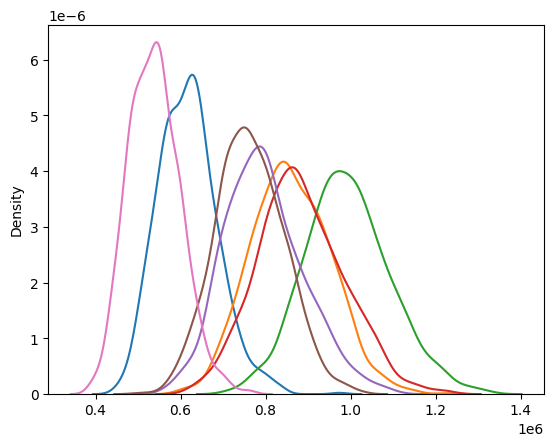

CI - Customers of age group 0-17 with sample size 100000 for 95% confidence
614784.8 , 623288.93
CI - Customers of age group 18-25 with sample size 100000 for 95% confidence
849505.72 , 860370.36
CI - Customers of age group 26-35 with sample size 100000 for 95% confidence
983123.02 , 996207.82
CI - Customers of age group 36-45 with sample size 100000 for 95% confidence
873798.29 , 885616.97
CI - Customers of age group 46-50 with sample size 100000 for 95% confidence
786736.32 , 798096.0
CI - Customers of age group 51-55 with sample size 100000 for 95% confidence
758380.77 , 768128.68
CI - Customers of age group 55+ with sample size 100000 for 95% confidence
535826.01 , 543489.54


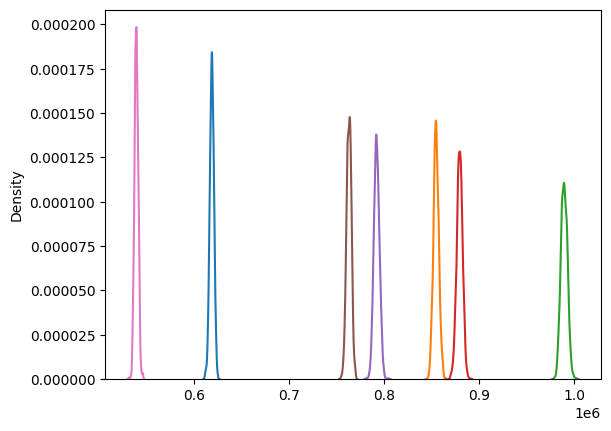

In [ ]:
n=[100,100000]
age_interval = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

for i in range(len(n)):

  for j in range(len(age_interval)):
    df_age1 = df_age[df_age['Age']==age_interval[j]][['Purchase']]
    sampling_df_age1 = [df_age1['Purchase'].sample(n[i],replace='True').mean() for _ in range(1000)]
    print(f'CI - Customers of age group {age_interval[j]} with sample size {n[i]} for 95% confidence')
    sns.kdeplot(sampling_df_age1)
    print(round(norm(np.mean(sampling_df_age1),np.std(sampling_df_age1)).ppf(0.025),2), ',', round(norm(np.mean(sampling_df_age1),np.std(sampling_df_age1)).ppf(0.975),2))

  plt.show()

### INFERENCE:
As the sample size increases the overlapping vividly fades away.

### CONCLUSION TO MAKE CHANGES:
Age group 0-17 contribute less spending products attracting them would increase their spending

## INSIGHTS:

**1. AGE:**
1. **80%** of the customers are between the age **18-50** (40%: 26-35, 18%: 18-25, 20%: 36-45)
2. Majority customers fall in age group of **26-35**

**2. Gender:**
1. **75%** of the users are **Male** and 25% are Female. Obviously, Males purchase more than females.

**3. Marital Status:**
1. **59%** - **Single**, 41% - Married. Single customers purchase more than married customers

**4. Stay in current city:**
1. **35%** Staying in the city for **1 year**, 18% for 2 years, 17% for 3 years

**5.City Category:**
1. The **majority number** of customers come from City Category **C**
2. But, people from City Category **B tend to purchase more**.

**6.Product Category:**
1. There are **20 unique product category**
2. The most frequently bought product category is **5(150933)**
3. Product **5 and 8** is more popular among **females** and **1** among **male**.

**7. Occupation:**
1.  Customers whose occupation is **4** purchase **more** than others then comes **0** and **7**
2. Customers whose occupation is **8** spend the **least**

**8. Product ID:**
1. The Product which made the top in the sales is **P00265242**(ie., 1880 times it is bought)


### RECOMMENDATIONS:


1. Male spent more than female, So company should focus on retaining the male customers and attracting more female customers.

2. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. So these products has to be restocked more frequently.

3. Product_Category - 17,9and 14 are least sold.So, those products are to be restocked in less quantity.

4. Focusing on offers that would attract married customers would increase their purchase rate

5. More number of customers are from city category C but their Purchase rate is low . So, emphasis on attracting customers in city C is important

6. In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

7.  Management should come-up with more kids loving products like snacks, ice creams, beverages to attract more younger generation to increase the sale.

8. Installing baby care facilities and play zone for kids too would attract more married and female customers.

9. Taking surveys especially involving customers whose occupation is 18,9,8 about their product of interest and their needs and restocking accordingly  would increase their purchase rate.

10. City category A purchase rate is very low which can be improved by creating seasonal offers and digital marketing and also can provide home delivery on a minimum spend.

